# Description

The Rubik's Cube is a pleasant and challenging pastime. In this exercise however, we don't want to solve the cube. We want to (mindlessly) execute the same sequence over and over again. We would like to know how long it will take us to go back to the original starting position.

Write a program which, given a series of moves, outputs the number of times that sequence must be executed to reach the original state again.

# Input Description 

A space separated series of movies in the official [WCA Notation](https://www.worldcubeassociation.org/regulations/#article-12-notation) will be given.

Summary (from [Challenge #157](https://www.reddit.com/r/dailyprogrammer/comments/22k8hu/492014_challenge_157_intermediate_puzzle_cube/?st=j8kfmdyb&sh=9f0157fe))
* There are 6 faces. U (up, the top face). D (down, the bottom face). L (left). R (right). F (front). B (back).
* Each face is turned like you were looking at it from the front.
* A notation such as X means you turn the X face clockwise 90'. So R L means turn the right face clockwise 90' (from its perspective), then the left face clockwise 90' (from its perspective).
* A notation such as X' (pronounced prime) means you turn the X face anticlockwise 90'. So R U' means turn the right face clockwise 90', then the top face anticlockwise 90'.
* notation such as X2 means you turn the X face 180'.

Example (each line is a separate challenge):

    R F2 L' U D B2

# Output Description 

The output should be the number of times you have to execute the input sequence to arrive at the original state.

# Challenge Inputs

    R
    R F2 L' U D B2
    R' F2 B F B F2 L' U F2 D R2 L R' B L B2 R U

# Challenge Outputs

    4
    18
    36

                
# Credit

This challenge was suggested by user /u/snow_in_march, many thanks! If you have an idea for a challenge please share it on /r/dailyprogrammer_ideas and there's a good chance we'll use it. 

In [1]:
import itertools
import re
from enum import IntEnum, Enum, auto

import matplotlib.pyplot as plt
import numpy as np
import pytest
from matplotlib import colors

In [2]:
MOVE_RE = re.compile(r"(?P<face>\w)(?P<ccw>'?)(?P<rev>2?)")
PLACEHOLDER = 99


class FACES(IntEnum):
    U = 0
    L = 1
    F = 2
    R = 3
    B = 4
    D = 5


class SIDE(Enum):
    U = auto()
    L = auto()
    R = auto()
    D = auto()


COLOR_DICT = {0: 'yellow',
              1: 'green',
              2: 'orange',
              3: 'blue',
              4: 'red',
              5: 'white',
              99: 'black'}

In [3]:
def create_new_cube():
    cube = np.zeros((6, 3, 3))
    for i, face in enumerate(cube):
        for j, row in enumerate(face):
            for k, col in enumerate(row):
                cube[i, j, k] = i * 10 + 3 * j + k
    return cube

In [4]:
def parse_sequence(string_sequence):
    return list(itertools.chain.from_iterable(map(parse_move, string_sequence.split(" "))))

In [5]:
def parse_move(string_move):
    move_match = MOVE_RE.match(string_move)
    move = [FACES[move_match['face']]]
    if move_match['rev']:
        move = move * 2
    elif move_match['ccw']:
        move = move * 3
    return move

In [6]:
def get_face_side(face, side):
    if side == SIDE.U:
        return face[0, :]
    if side == SIDE.L:
        return face[:, 0]
    if side == SIDE.R:
        return face[:, 2]
    if side == SIDE.D:
        return face[2, :]

In [7]:
def perform_move(cube, face):
    all_index = [0, 1, 2]

    if face == FACES.F:
        a = get_face_side(cube[0], SIDE.D)
        temp = np.copy(a)
        b = get_face_side(cube[1], SIDE.R)
        c = get_face_side(cube[5], SIDE.U)
        d = get_face_side(cube[3], SIDE.L)

        np.put(a, all_index, np.copy(b[::-1]))
        np.put(b, all_index, np.copy(c))
        np.put(c, all_index, np.copy(d[::-1]))
        np.put(d, all_index, temp)

    if face == FACES.R:
        a = get_face_side(cube[0], SIDE.R)
        temp = np.copy(a)
        b = get_face_side(cube[2], SIDE.R)
        c = get_face_side(cube[5], SIDE.R)
        d = get_face_side(cube[4], SIDE.L)

        np.put(a, all_index, np.copy(b))
        np.put(b, all_index, np.copy(c))
        np.put(c, all_index, np.copy(d[::-1]))
        np.put(d, all_index, temp[::-1])

    if face == FACES.L:
        a = get_face_side(cube[0], SIDE.L)
        temp = np.copy(a)
        b = get_face_side(cube[4], SIDE.R)
        c = get_face_side(cube[5], SIDE.L)
        d = get_face_side(cube[2], SIDE.L)

        np.put(a, all_index, np.copy(b[::-1]))
        np.put(b, all_index, np.copy(c[::-1]))
        np.put(c, all_index, np.copy(d))
        np.put(d, all_index, temp)

    if face == FACES.B:
        a = get_face_side(cube[0], SIDE.U)
        temp = np.copy(a)
        b = get_face_side(cube[3], SIDE.R)
        c = get_face_side(cube[5], SIDE.D)
        d = get_face_side(cube[1], SIDE.L)

        np.put(a, all_index, np.copy(b))
        np.put(b, all_index, np.copy(c[::-1]))
        np.put(c, all_index, np.copy(d))
        np.put(d, all_index, temp[::-1])

    if face == FACES.U:
        a = get_face_side(cube[1], SIDE.U)
        temp = np.copy(a)
        b = get_face_side(cube[2], SIDE.U)
        c = get_face_side(cube[3], SIDE.U)
        d = get_face_side(cube[4], SIDE.U)

        np.put(a, all_index, np.copy(b))
        np.put(b, all_index, np.copy(c))
        np.put(c, all_index, np.copy(d))
        np.put(d, all_index, temp)

    if face == FACES.D:
        a = get_face_side(cube[4], SIDE.D)
        temp = np.copy(a)
        b = get_face_side(cube[3], SIDE.D)
        c = get_face_side(cube[2], SIDE.D)
        d = get_face_side(cube[1], SIDE.D)

        np.put(a, all_index, np.copy(b))
        np.put(b, all_index, np.copy(c))
        np.put(c, all_index, np.copy(d))
        np.put(d, all_index, temp)

    cube[face] = np.rot90(cube[face], -1)

    return cube

In [8]:
def perform_moves(cube, moves):
    for move in moves:
        cube = perform_move(cube, move)

    return cube

In [9]:
def flatten_cube(cube):
    empty = np.zeros((3, 3)) + PLACEHOLDER
    top_row = np.concatenate((empty, cube[0], empty, empty), axis=1)
    mid_row = np.concatenate(cube[1:5], axis=1)
    bot_row = np.concatenate((empty, cube[5], empty, empty), axis=1)
    return np.concatenate((top_row, mid_row, bot_row), axis=0)

In [10]:
def print_cube(cube):
    flat = flatten_cube(cube)
    print("\n".join(["".join([COLOR_DICT[c // 10] if c != PLACEHOLDER else ' ' for c in row]) for row in flat]))

In [11]:
def mpl_cube(cube):
    flat = flatten_cube(cube)

    # create discrete colormap
    cmap = colors.ListedColormap(['yellow', 'green', 'orange', 'blue', 'red', 'white', 'black'])
    bounds = [0, 10, 20, 30, 40, 50, 90, 100]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(figsize=(9 / 2, 3))
    ax.imshow(flat[::-1], cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, 15, 1))
    ax.set_yticks(np.arange(-.5, 15, 1))
    ax.set_xlim(-0.5, 11.5)
    ax.set_ylim(-0.5, 8.5)
    ax.tick_params(axis='both', which='both',length=0)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    plt.show()

In [12]:
def entire_challenge(string_sequence):
    sequence = parse_sequence(string_sequence)
    orig = create_new_cube()
    flat_orig = flatten_cube(orig)
    cube = np.copy(orig)

    cube = perform_moves(cube, sequence)
    num_moves = 1

    while not np.array_equal(flat_orig , flatten_cube(cube)):
        cube = perform_moves(cube, sequence)
        num_moves += 1

    return cube, num_moves

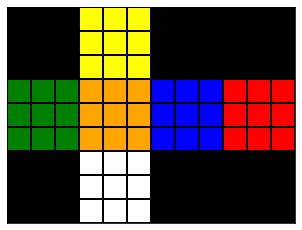

4


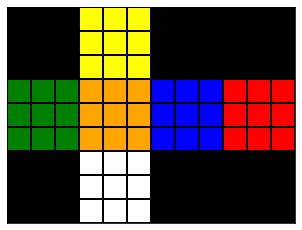

In [13]:
mpl_cube(create_new_cube())
cube, num_moves = entire_challenge("R")
print(num_moves)
mpl_cube(cube)

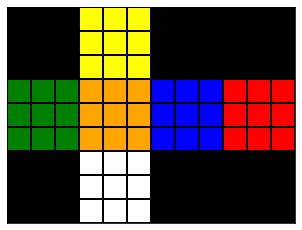

18


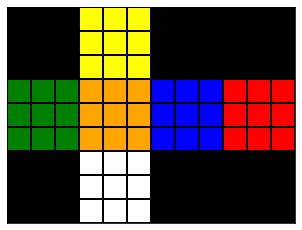

In [14]:
mpl_cube(create_new_cube())
cube, num_moves = entire_challenge("R F2 L' U D B2")
print(num_moves)
mpl_cube(cube)

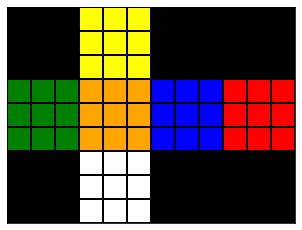

36


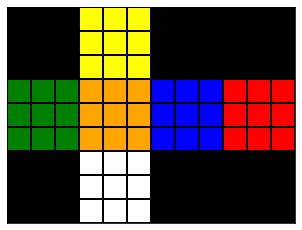

In [15]:
mpl_cube(create_new_cube())
cube, num_moves = entire_challenge("R' F2 B F B F2 L' U F2 D R2 L R' B L B2 R U")
print(num_moves)
mpl_cube(cube)

## Tests
Need to be run outside of notebook

In [16]:

MOVE_CASES = [
    (parse_sequence("F"), np.array([[[0, 1, 2],
                                     [3, 4, 5],
                                     [18, 15, 12]],
                                    [[10, 11, 50],
                                     [13, 14, 51],
                                     [16, 17, 52]],
                                    [[26, 23, 20],
                                     [27, 24, 21],
                                     [28, 25, 22]],
                                    [[6, 31, 32],
                                     [7, 34, 35],
                                     [8, 37, 38]],
                                    [[40, 41, 42],
                                     [43, 44, 45],
                                     [46, 47, 48]],
                                    [[36, 33, 30],
                                     [53, 54, 55],
                                     [56, 57, 58]]])),
    ([], np.array([[[0, 1, 2],
                    [3, 4, 5],
                    [6, 7, 8]],
                   [[10, 11, 12],
                    [13, 14, 15],
                    [16, 17, 18]],
                   [[20, 21, 22],
                    [23, 24, 25],
                    [26, 27, 28]],
                   [[30, 31, 32],
                    [33, 34, 35],
                    [36, 37, 38]],
                   [[40, 41, 42],
                    [43, 44, 45],
                    [46, 47, 48]],
                   [[50, 51, 52],
                    [53, 54, 55],
                    [56, 57, 58]]])),
    (parse_sequence("R R R R"), np.array([[[0, 1, 2],
                                           [3, 4, 5],
                                           [6, 7, 8]],
                                          [[10, 11, 12],
                                           [13, 14, 15],
                                           [16, 17, 18]],
                                          [[20, 21, 22],
                                           [23, 24, 25],
                                           [26, 27, 28]],
                                          [[30, 31, 32],
                                           [33, 34, 35],
                                           [36, 37, 38]],
                                          [[40, 41, 42],
                                           [43, 44, 45],
                                           [46, 47, 48]],
                                          [[50, 51, 52],
                                           [53, 54, 55],
                                           [56, 57, 58]]])),
    (parse_sequence("R"), np.array([[[0, 1, 22],
                                     [3, 4, 25],
                                     [6, 7, 28]],
                                    [[10, 11, 12],
                                     [13, 14, 15],
                                     [16, 17, 18]],
                                    [[20, 21, 52],
                                     [23, 24, 55],
                                     [26, 27, 58]],
                                    [[36, 33, 30],
                                     [37, 34, 31],
                                     [38, 35, 32]],
                                    [[8, 41, 42],
                                     [5, 44, 45],
                                     [2, 47, 48]],
                                    [[50, 51, 46],
                                     [53, 54, 43],
                                     [56, 57, 40]]])),
    (parse_sequence("L"), np.array([[[48, 1, 2],
                                     [45, 4, 5],
                                     [42, 7, 8]],
                                    [[16, 13, 10],
                                     [17, 14, 11],
                                     [18, 15, 12]],
                                    [[0, 21, 22],
                                     [3, 24, 25],
                                     [6, 27, 28]],
                                    [[30, 31, 32],
                                     [33, 34, 35],
                                     [36, 37, 38]],
                                    [[40, 41, 56],
                                     [43, 44, 53],
                                     [46, 47, 50]],
                                    [[20, 51, 52],
                                     [23, 54, 55],
                                     [26, 57, 58]]])),
    (parse_sequence("L2"), np.array([[[50, 1, 2],
                                      [53, 4, 5],
                                      [56, 7, 8]],
                                     [[18, 17, 16],
                                      [15, 14, 13],
                                      [12, 11, 10]],
                                     [[48, 21, 22],
                                      [45, 24, 25],
                                      [42, 27, 28]],
                                     [[30, 31, 32],
                                      [33, 34, 35],
                                      [36, 37, 38]],
                                     [[40, 41, 26],
                                      [43, 44, 23],
                                      [46, 47, 20]],
                                     [[0, 51, 52],
                                      [3, 54, 55],
                                      [6, 57, 58]]])),
    (parse_sequence("L'"), np.array([[[20, 1, 2],
                                      [23, 4, 5],
                                      [26, 7, 8]],
                                     [[12, 15, 18],
                                      [11, 14, 17],
                                      [10, 13, 16]],
                                     [[50, 21, 22],
                                      [53, 24, 25],
                                      [56, 27, 28]],
                                     [[30, 31, 32],
                                      [33, 34, 35],
                                      [36, 37, 38]],
                                     [[40, 41, 6],
                                      [43, 44, 3],
                                      [46, 47, 0]],
                                     [[48, 51, 52],
                                      [45, 54, 55],
                                      [42, 57, 58]]])),
    (parse_sequence("B"), np.array([[[32, 35, 38],
                                     [3, 4, 5],
                                     [6, 7, 8]],
                                    [[2, 11, 12],
                                     [1, 14, 15],
                                     [0, 17, 18]],
                                    [[20, 21, 22],
                                     [23, 24, 25],
                                     [26, 27, 28]],
                                    [[30, 31, 58],
                                     [33, 34, 57],
                                     [36, 37, 56]],
                                    [[46, 43, 40],
                                     [47, 44, 41],
                                     [48, 45, 42]],
                                    [[50, 51, 52],
                                     [53, 54, 55],
                                     [10, 13, 16]]])),
    (parse_sequence("U"), np.array([[[6, 3, 0],
                                     [7, 4, 1],
                                     [8, 5, 2]],
                                    [[20, 21, 22],
                                     [13, 14, 15],
                                     [16, 17, 18]],
                                    [[30, 31, 32],
                                     [23, 24, 25],
                                     [26, 27, 28]],
                                    [[40, 41, 42],
                                     [33, 34, 35],
                                     [36, 37, 38]],
                                    [[10, 11, 12],
                                     [43, 44, 45],
                                     [46, 47, 48]],
                                    [[50, 51, 52],
                                     [53, 54, 55],
                                     [56, 57, 58]]])),
    (parse_sequence("D"), np.array([[[0, 1, 2],
                                     [3, 4, 5],
                                     [6, 7, 8]],
                                    [[10, 11, 12],
                                     [13, 14, 15],
                                     [46, 47, 48]],
                                    [[20, 21, 22],
                                     [23, 24, 25],
                                     [16, 17, 18]],
                                    [[30, 31, 32],
                                     [33, 34, 35],
                                     [26, 27, 28]],
                                    [[40, 41, 42],
                                     [43, 44, 45],
                                     [36, 37, 38]],
                                    [[56, 53, 50],
                                     [57, 54, 51],
                                     [58, 55, 52]]]))
]


@pytest.mark.parametrize("moves, expected_cube", MOVE_CASES)
def test_cube_moves(moves, expected_cube):
    test_cube = create_new_cube()
    test_cube = perform_moves(test_cube, moves)
    x = test_cube == expected_cube
    assert np.array_equal(test_cube, expected_cube)


def test_cube_reverse():
    cube_1 = create_new_cube()
    cube_2 = create_new_cube()
    cube_1 = perform_moves(cube_1, parse_sequence("L L L"))
    cube_2 = perform_moves(cube_2, parse_sequence("L'"))
    assert np.array_equal(cube_1, cube_2)


INPUTS = [("R", 4),
          ("R F2 L' U D B2", 18),
          ("L' R D' U F' B L' R", 3),
          ("F B2 R' D2 B R U D' R L' D' F' R2 D F2 B'", 3),
          ("R' F2 B F B F2 L' U F2 D R2 L R' B L B2 R U", 36)]


@pytest.mark.parametrize("string_sequence, expected_moves", INPUTS)
def test_inputs(string_sequence, expected_moves):
    assert entire_challenge(string_sequence) == expected_moves